# 코로나19 백신접종 분석

# 코로나19

2019년 12월 중국에서 최초로 발병하여, 2020년 1월부터 본격적으로 전 세계로 확산되어 수많은 사망자를 기록한 전례없는 전염병으로 기록되고 있다.
증상으로는 발열, 기침, 피로감, 호흡곤란, 후각상실, 미각상실이 공통적으로 나타난다. 폐렴, 급성호흡곤란증후군이 합병증으로 나타날 수도 있다. 잠복기는 대략 5일 정도이나 1일에서 14일까지 다양한 사례가 보고되었다.
예방을 위해 사회적 거리두기와 보건용 마스크 착용이 사회적으로 강조되고 있다.
2020년 12월 영국에서 처음으로 백신 접종이 시작되었으며, 현재까지 많은 나라에서 백신접종을 시작한 상태이다.

<br>
<br>

# 1. 데이터 수집

## a. 라이브러리 및 데이터 불러오기

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

sns.set(style='darkgrid')
sns.set(color_codes = True)
mpl.rc('font', family='Malgun Gothic')

In [32]:
data = pd.read_csv('./country_vaccinations.csv') # 분석 해야할 csv 파일을 불러옵니다.
vacc_df = data.copy() # 원본 데이터를 따로 복사하여 데이터를 분석합니다.

In [33]:
vacc_df.head() # head 함수를 이용해 분석하고자 하는 데이터의 행과 열을 확인합니다. (상위 N개, 기본값 5개)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/


## b. 데이터 확인 후, 분석 계획 설립하기

| 컬럼 명 |  컬럼 의미 |
|--------|-----------|
| country | 국가 |
| iso_code | 국가의 country iso code |
| date | 날짜 |
| total_vaccinations | 총 백신 접종 수 |
| people_vaccinated | 총 백신 접종자 수 |
| people_fully_vaccinated | 전체 백신을 접종한 총 인원 |
| daily_vaccinations_raw | 일일 백신 접종(원본) |
| daily_vaccinations  | 일일 백신 접종 |
| total_vaccinations_per_hundred | 100개당 총 백신 접종 수 |
| people_vaccinated_per_hundred | 100명당 총 백신 접종자 수 |
| people_fully_vaccinated_per_hundred | 100명당 완전 백신 접종자 수 |
| daily_vaccinations_per_million | 국가별 예방접종 수 및 총인구 간 비율 |
| vaccines | 국가에서 사용되는 백신 |
| source_name | 출처 이름 |
| source_website | 출처 웹사이트 |

#### 분석 순서
- 1. 백신의 종류 및 수량 분석
- 2. 상위(30) 국가별 백신 접종 분석 
- 3. 한국의 백신 접종 분석
- 4. 한국 및 근처 아시아 국가의 백신 접종 분석

In [34]:
vacc_df.info() # info 함수로 전반적인 데이터의 정보를 확인합니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23468 entries, 0 to 23467
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              23468 non-null  object 
 1   iso_code                             23468 non-null  object 
 2   date                                 23468 non-null  object 
 3   total_vaccinations                   13188 non-null  float64
 4   people_vaccinated                    12396 non-null  float64
 5   people_fully_vaccinated              9771 non-null   float64
 6   daily_vaccinations_raw               10930 non-null  float64
 7   daily_vaccinations                   23239 non-null  float64
 8   total_vaccinations_per_hundred       13188 non-null  float64
 9   people_vaccinated_per_hundred        12396 non-null  float64
 10  people_fully_vaccinated_per_hundred  9771 non-null   float64
 11  daily_vaccinations_per_milli

In [35]:
vacc_df.isnull().sum() # isnull, sum 함수로 결측치의 수를 더하여 한눈에 확인합니다.

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     10280
people_vaccinated                      11072
people_fully_vaccinated                13697
daily_vaccinations_raw                 12538
daily_vaccinations                       229
total_vaccinations_per_hundred         10280
people_vaccinated_per_hundred          11072
people_fully_vaccinated_per_hundred    13697
daily_vaccinations_per_million           229
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

<AxesSubplot:>

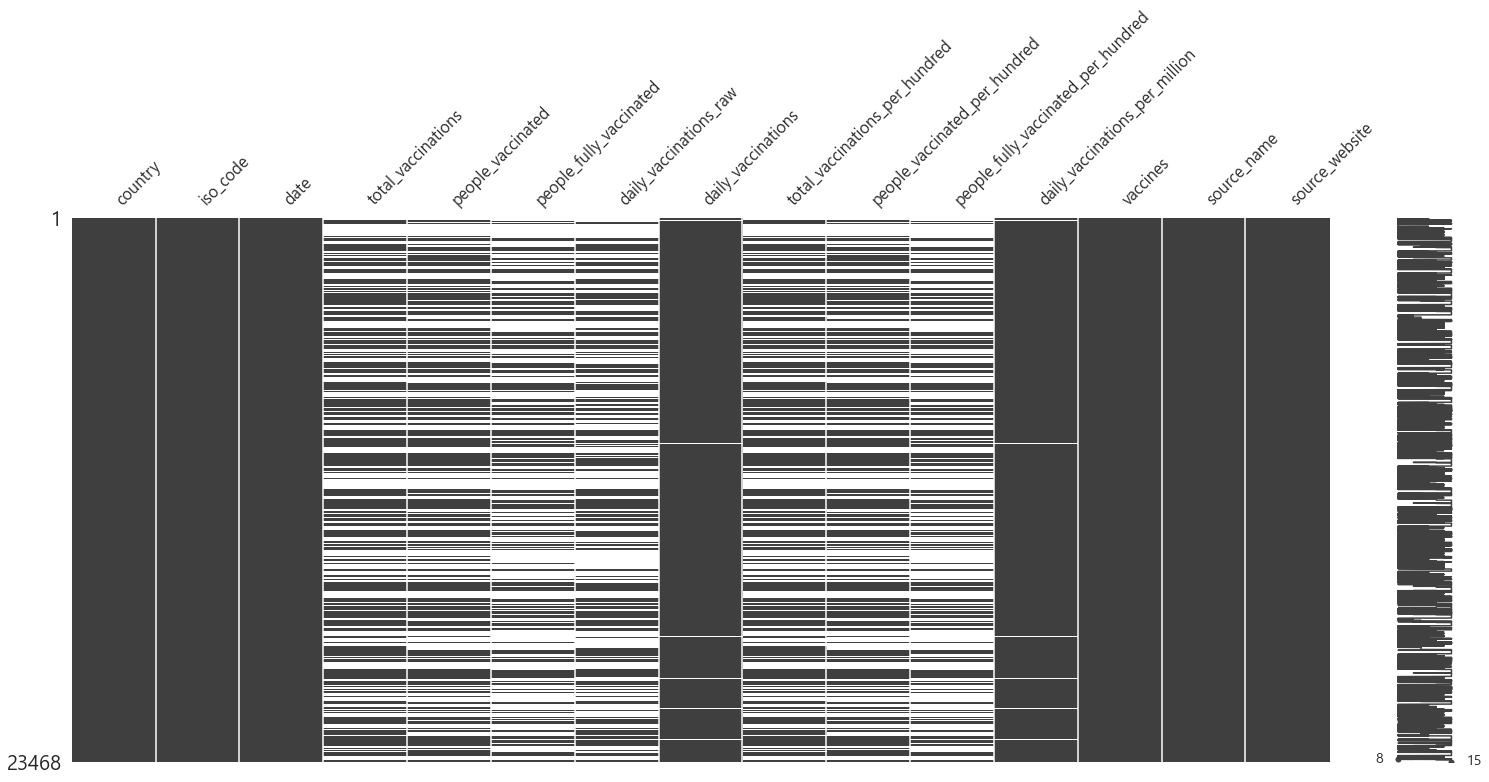

In [36]:
msno.matrix(df=vacc_df) # msno 라이브러리를 이용하여 결측치의 값을 그래프로 출력합니다.

<AxesSubplot:>

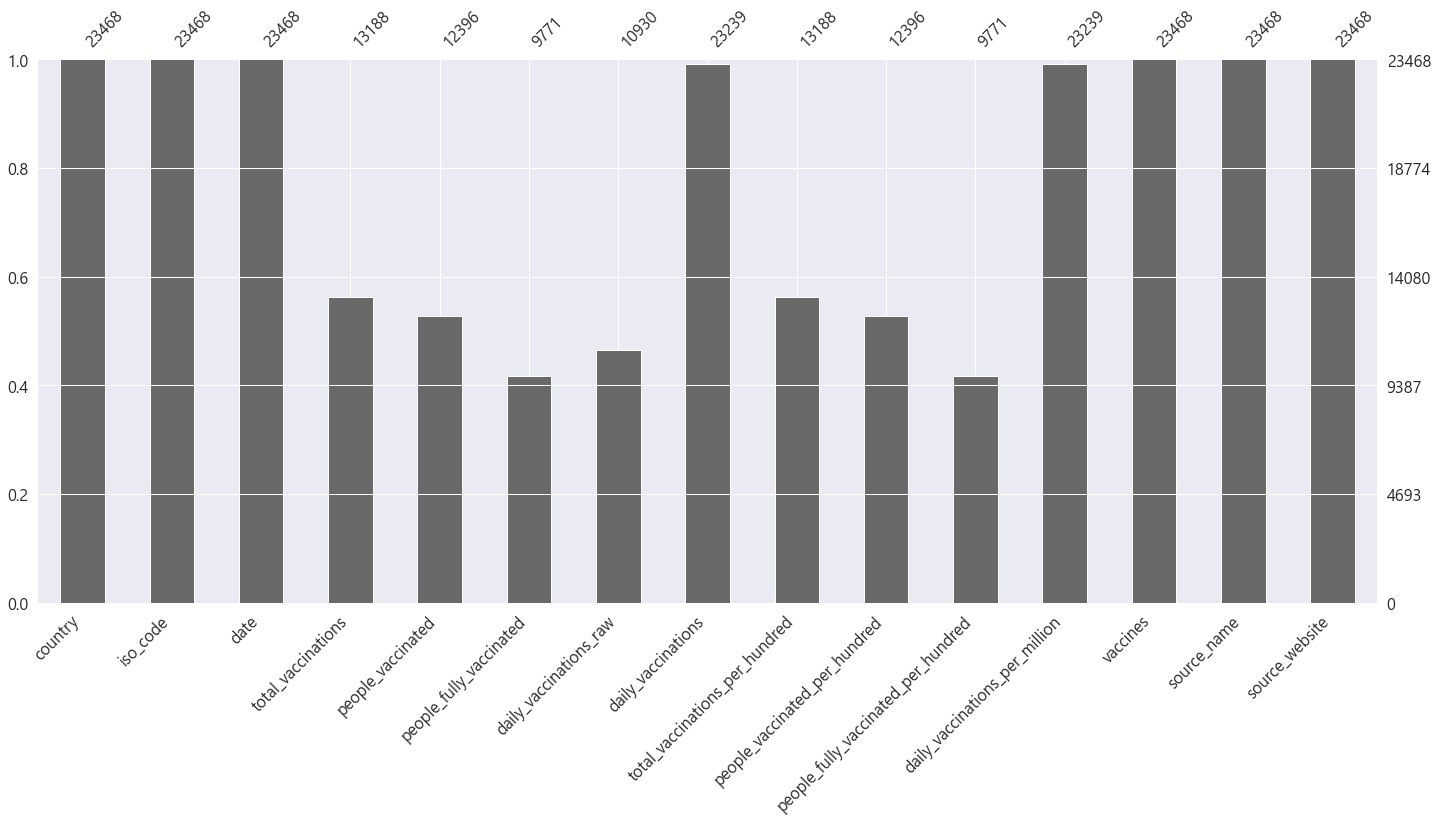

In [37]:
msno.bar(df=vacc_df)

In [38]:
vacc_df.fillna(value=0, inplace=True) # fillna 함수를 이용하여 결측치의 값을 0으로 변환해줍니다.

<AxesSubplot:>

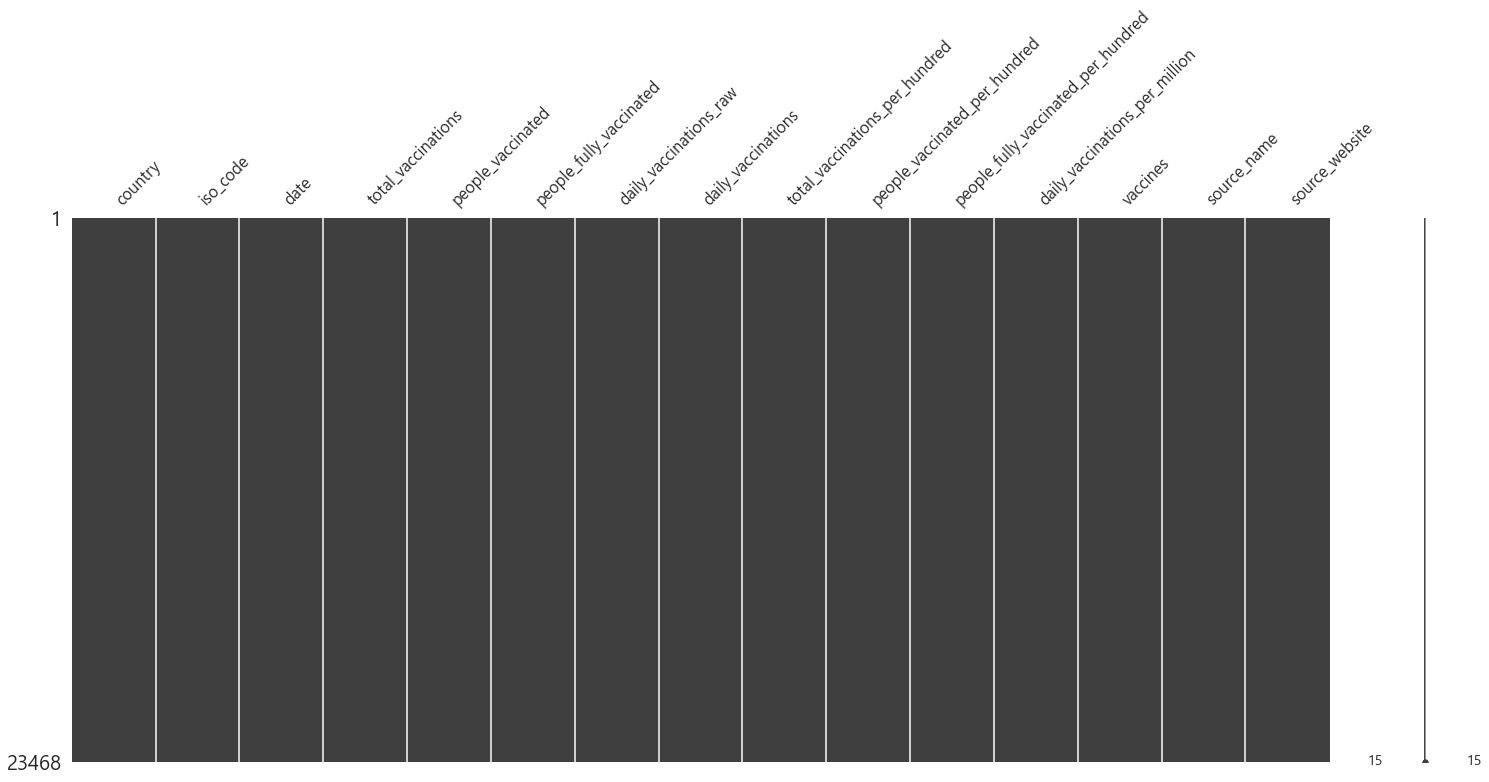

In [39]:
msno.matrix(df=vacc_df)

<AxesSubplot:>

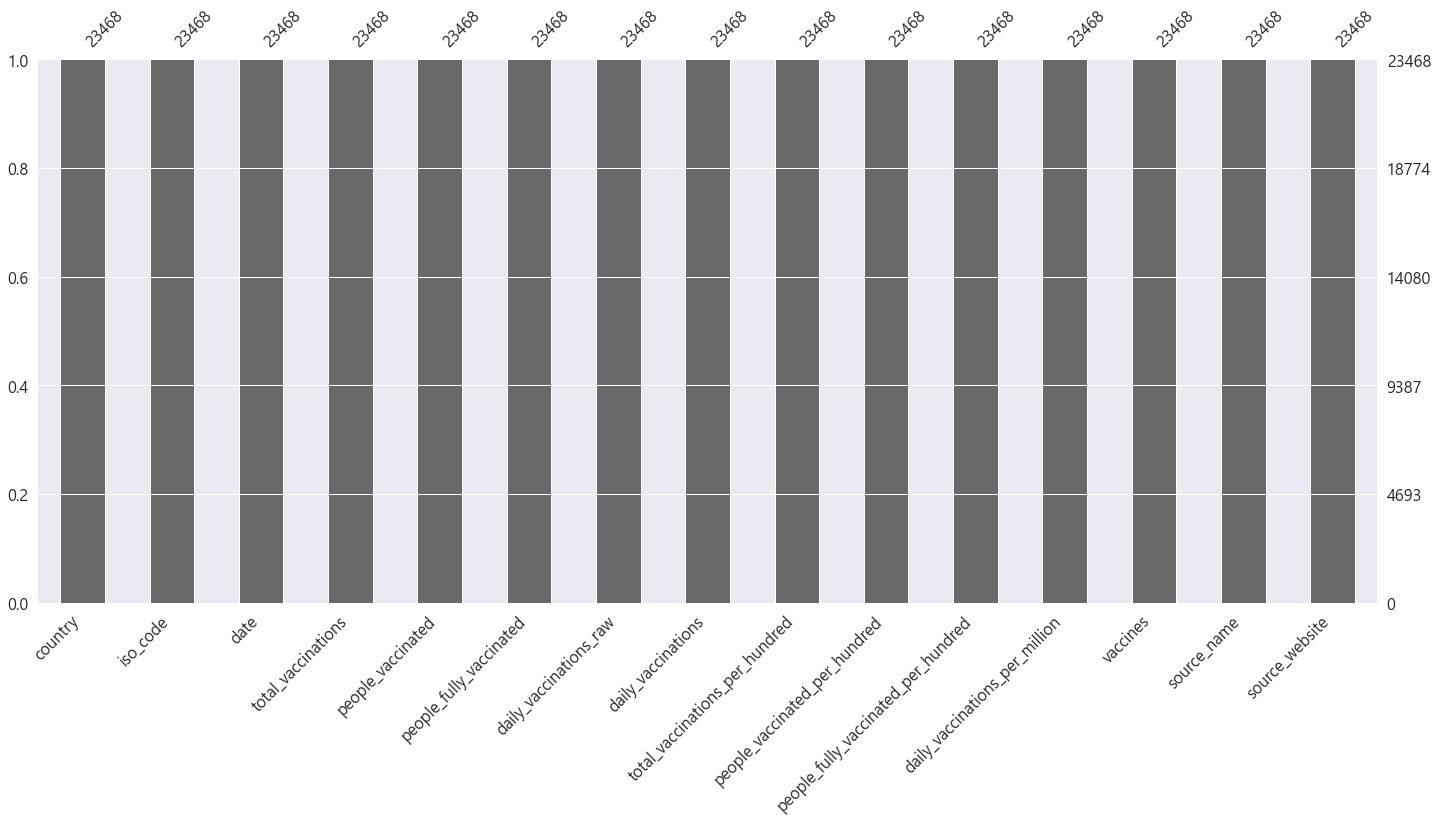

In [40]:
msno.bar(df=vacc_df)

In [41]:
vacc_list = vacc_df['vaccines'].value_counts().index.tolist() # vaccines 인덱스를 리스트형식으로 변환하여 추출합니다.

<br>
<br>

## 1. 백신의 종류 및 수량

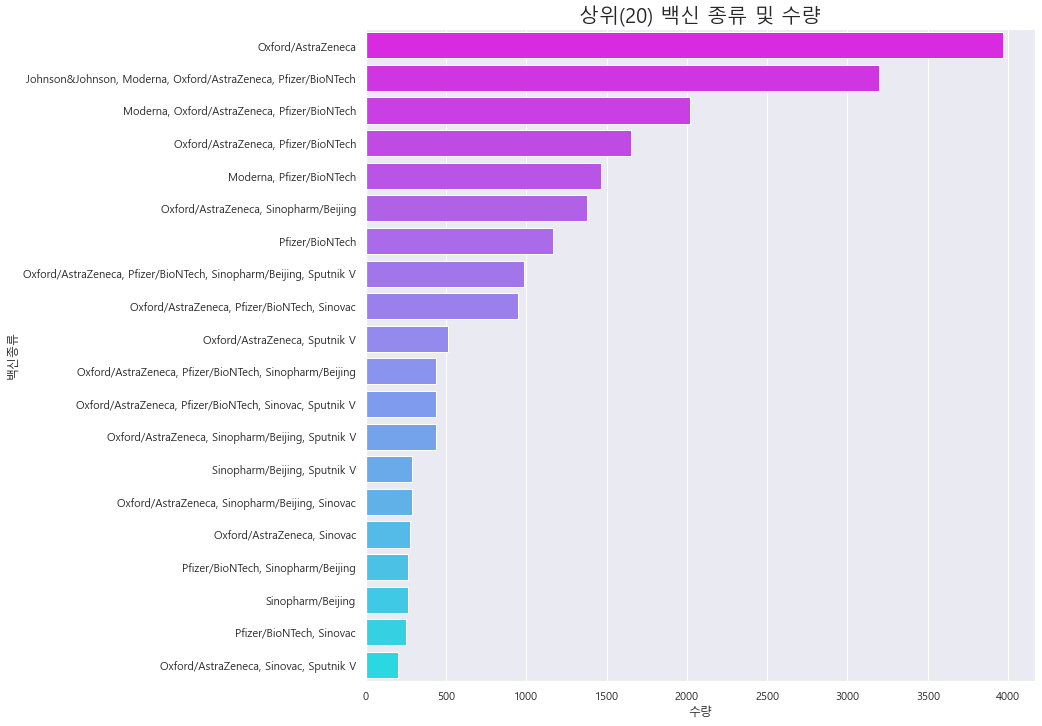

In [42]:
plt.figure(figsize=(12,12)) # 그래프의 크기를 정해줍니다.
sns.countplot(data=vacc_df, # x축으로 전체 데이터를 불러옵니다.
              y='vaccines', # y축으로 백신의 종류를 불러옵니다.
              order=vacc_list[:20], # 위에 추출한 리스트의 20개의 목록만 보여주도록 설정합니다.
              palette='cool_r') # 색상을 지정해줍니다.
plt.title('상위(20) 백신 종류 및 수량', fontsize=20)
plt.xlabel('수량')
plt.ylabel('백신종류')
plt.show()

<br>
<br>

### 전 세계적으로 아스트라제네카의 접종 수가 가장 많으며, 그 뒤로 모더나, 화이자, 그리고 중국의시노팜 백신이 많이 접종되었다는 걸 확인할 수 있다.

In [43]:
vacc_df.vaccines.value_counts().head(20)

Oxford/AstraZeneca                                                   3970
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech        3196
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                         2020
Oxford/AstraZeneca, Pfizer/BioNTech                                  1655
Moderna, Pfizer/BioNTech                                             1465
Oxford/AstraZeneca, Sinopharm/Beijing                                1378
Pfizer/BioNTech                                                      1169
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V     986
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac                          951
Oxford/AstraZeneca, Sputnik V                                         515
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing                441
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V               441
Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V                      438
Sinopharm/Beijing, Sputnik V          

In [44]:
vacc_df['date'] = pd.to_datetime(vacc_df.date) # objecet 형식의 데이트컬럼을 datetime 형식으로 변환해 줍니다.

In [45]:
vacc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23468 entries, 0 to 23467
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              23468 non-null  object        
 1   iso_code                             23468 non-null  object        
 2   date                                 23468 non-null  datetime64[ns]
 3   total_vaccinations                   23468 non-null  float64       
 4   people_vaccinated                    23468 non-null  float64       
 5   people_fully_vaccinated              23468 non-null  float64       
 6   daily_vaccinations_raw               23468 non-null  float64       
 7   daily_vaccinations                   23468 non-null  float64       
 8   total_vaccinations_per_hundred       23468 non-null  float64       
 9   people_vaccinated_per_hundred        23468 non-null  float64       
 10  people_ful

In [46]:
vacc_df['total_vaccinations(count)'] = vacc_df.groupby('country').total_vaccinations.tail(1) # 전 세계 국가와 총 백신 접종 수를 그룹화하여 총 백신 접종 수의 마지막 값을 가져와 새로운 카운트 칼럼을 생성합니다.

In [47]:
vacc_df.groupby('country')['total_vaccinations(count)'].mean().sort_values(ascending=False).head(30) # 전 세계 국가와 새로 생성한 카운트 칼럼을 그룹화하여 평균을 구한 뒤 내림차순으로 상위 30개의 정보만 불러옵니다.

country
China                   808962000.0
United States           303923667.0
India                   233680929.0
Brazil                   74541089.0
United Kingdom           68800879.0
England                  57844499.0
Germany                  55546616.0
France                   40841175.0
Italy                    39312253.0
Mexico                   34658545.0
Turkey                   31589838.0
Russia                   31295788.0
Spain                    30472862.0
Indonesia                29616507.0
Canada                   26855647.0
Poland                   22737088.0
Chile                    19644506.0
Japan                    19371685.0
Morocco                  15798674.0
Saudi Arabia             15221683.0
Argentina                14663805.0
United Arab Emirates     13347300.0
Colombia                 11733523.0
South Korea              11527605.0
Israel                   10602001.0
Bangladesh               10040964.0
Netherlands               9934313.0
Hungary             

<br>
<br>

## 2. 상위(30) 국가별 백신 접종 분석 

<br>
<br>

### 중국, 미국, 인도 순으로 백신을 많이 맞았으며, 한국은 24번째로 백신을 많이 맞은 국가로 확인된다.

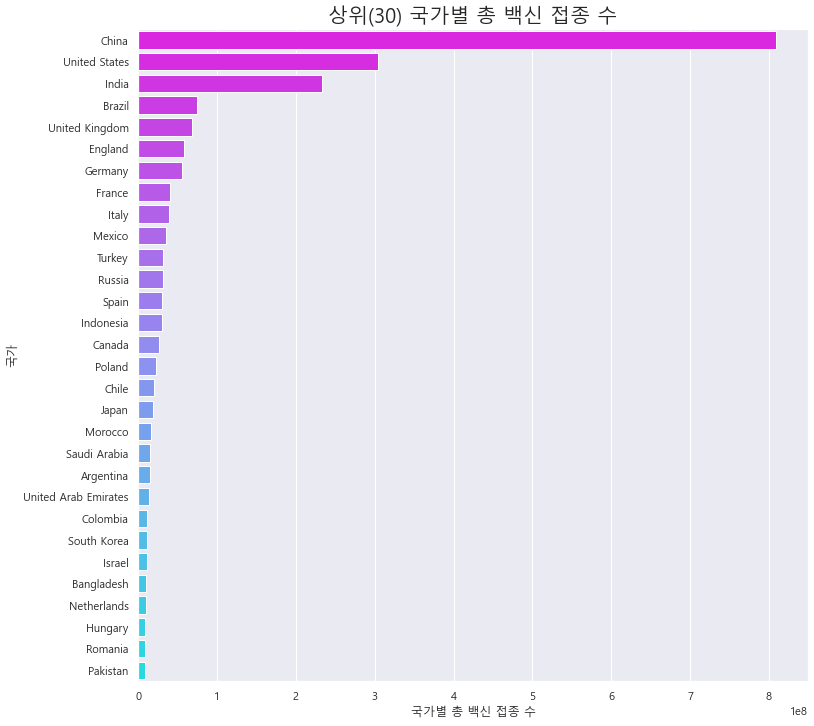

In [48]:
x = vacc_df.groupby('country')['total_vaccinations(count)'].mean().sort_values(ascending=False).head(30) # 위에 출력한 값을 x 변수에 담아서 그래프를 출력합니다. 
plt.figure(figsize=(12,12)) # 그래프의 크기를 정해줍니다.
sns.barplot(x.values, # x축으로 변수 x의 값을 불러옵니다.  
            x.index, # y 축으로 변수 x의 인덱스(명칭)을 불러옵니다.
            palette='cool_r') # 색상을 지정해줍니다.
plt.title('상위(30) 국가별 총 백신 접종 수', fontsize=20)
plt.xlabel('국가별 총 백신 접종 수')
plt.ylabel('국가')
plt.show()

In [49]:
vacc_df['fully_vaccinations(count)'] = vacc_df.groupby('country').people_fully_vaccinated.tail(1) # 위와 동일한 방법으로 전체 백신을 접종한 인원의 카운트 칼럼을 생성합니다.

In [50]:
vacc_df.groupby('country')['fully_vaccinations(count)'].mean().sort_values(ascending=False).head(30)

country
United States     140441957.0
India              45317035.0
United Kingdom     28227362.0
England            23954753.0
Brazil             23485276.0
Germany            18187186.0
Mexico             14193288.0
Russia             13513629.0
Turkey             13350452.0
Italy              13338891.0
France             12906685.0
Indonesia          11356025.0
Spain              11260175.0
Poland              8621029.0
Chile               8544845.0
Morocco             6457177.0
Israel              5139005.0
Japan               4866397.0
Bangladesh          4217719.0
Romania             3997752.0
Hungary             3989525.0
Colombia            3471207.0
Netherlands         3357502.0
Canada              3184937.0
Argentina           3085996.0
Belgium             2587467.0
Greece              2435852.0
South Korea         2325259.0
Pakistan            2310115.0
Scotland            2282203.0
Name: fully_vaccinations(count), dtype: float64

<br>
<br>

### 2회 이상 완벽하게 백신을 접종한 국가는 미국, 인도, 영국 순으로 나타나며, 미국 제약사인 모더나, 화이자의 백신 공급으로 미국의 그래프가 높은 것을 확인할 수 있다.

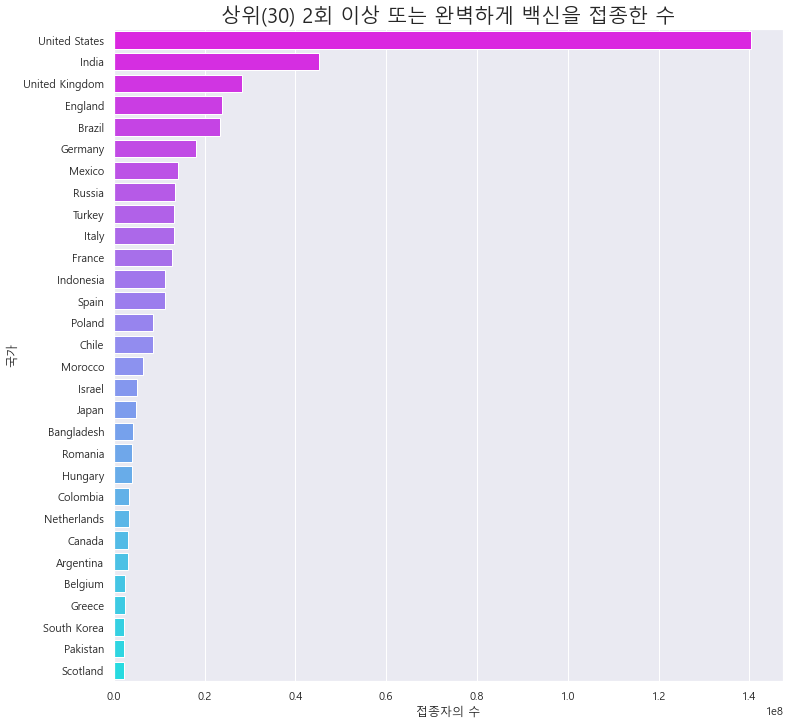

In [51]:
x = vacc_df.groupby('country')['fully_vaccinations(count)'].mean().sort_values(ascending=False).head(30) # 위에 출력한 값을 x 변수에 담아서 그래프를 출력합니다. 
plt.figure(figsize=(12,12)) # 그래프의 크기를 정해줍니다.
sns.barplot(x.values, # x축으로 변수 x의 값을 불러옵니다.  
            x.index, # y 축으로 변수 x의 인덱스(명칭)을 불러옵니다.
            palette='cool_r') # 색상을 지정해줍니다.
plt.title('상위(30) 2회 이상 또는 완벽하게 백신을 접종한 수', fontsize=20)
plt.xlabel('접종자의 수')
plt.ylabel('국가')
plt.show()

In [52]:
vacc_df['daily_vaccinations(count)'] = vacc_df.groupby('country').daily_vaccinations.tail(1) # 위와 동일한 방법으로 일일 백신 접종의 카운트 칼럼을 생성합니다.

In [53]:
vacc_df.groupby('country')['daily_vaccinations(count)'].mean().sort_values(ascending=False).head(30)

country
China                 18150571.0
India                  2935027.0
United States          1074204.0
Brazil                  899553.0
Japan                   767665.0
Germany                 696862.0
Mexico                  597263.0
France                  570197.0
Italy                   547643.0
United Kingdom          512715.0
Spain                   479018.0
South Korea             424440.0
England                 422989.0
Canada                  383757.0
Indonesia               329661.0
Turkey                  316308.0
Poland                  314435.0
Argentina               309532.0
Russia                  281514.0
Pakistan                235798.0
Colombia                234486.0
Morocco                 197814.0
Thailand                186235.0
Venezuela               175529.0
Dominican Republic      170802.0
Cuba                    140807.0
Chile                   135018.0
Saudi Arabia            127130.0
Belgium                 123979.0
Australia               120177.0
Na

<br>
<br>

### 인구가 많은 중국이 일일 백신 접종 수가 압도적으로 많은 것을 확인할 수 있으며,(중국은 독자개발한 시노팜을 맞기 때문인것 같다) 그 뒤로 미국, 인도, 브라질 순으로 일일 백신 접종 수가 높은 것을 확인할 수 있다.

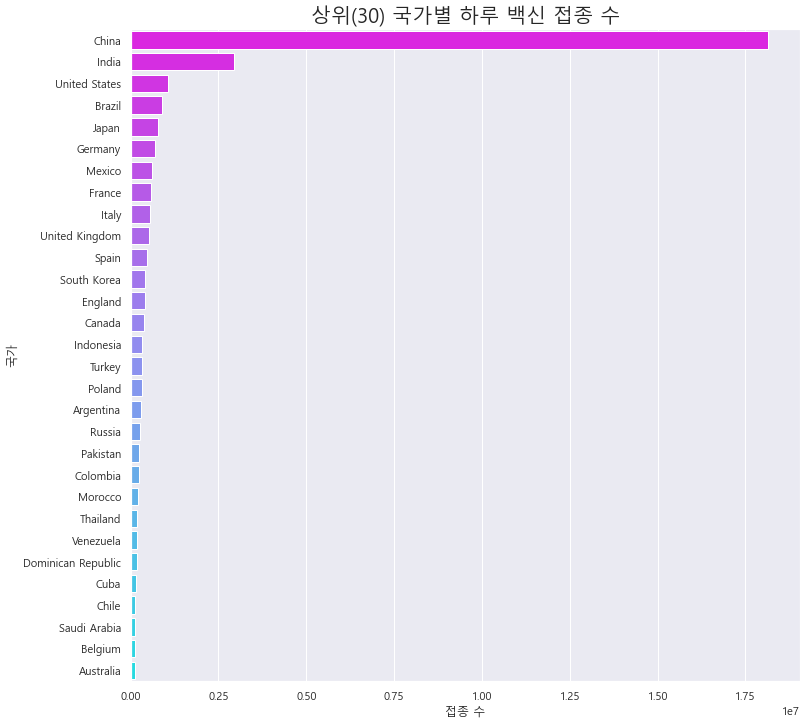

In [54]:
x = vacc_df.groupby('country')['daily_vaccinations(count)'].mean().sort_values(ascending=False).head(30) # 위에 출력한 값을 x 변수에 담아서 그래프를 출력합니다.
plt.figure(figsize=(12,12)) # 그래프의 크기를 정해줍니다.
sns.barplot(x.values, # x축으로 변수 x의 값을 불러옵니다. 
            x.index, # y 축으로 변수 x의 인덱스(명칭)을 불러옵니다.
            palette='cool_r') # 색상을 지정해줍니다.
plt.title('상위(30) 국가별 하루 백신 접종 수', fontsize=20)
plt.xlabel('접종 수')
plt.ylabel('국가')
plt.show()

In [55]:
vacc_df['people_fully_vaccinations_per_hundred(count)'] = vacc_df.groupby('country').people_fully_vaccinated_per_hundred.tail(1) # 위와 동일한 방법으로 100명당 완전 백신 접종자 수의 카운트 칼럼을 생성합니다.

In [56]:
vacc_df.groupby('country')['people_fully_vaccinations_per_hundred(count)'].mean().sort_values(ascending=False).head(30)

country
Gibraltar                   114.67
Seychelles                   66.98
San Marino                   63.59
Cayman Islands               59.48
Israel                       59.37
Saint Helena                 58.16
Malta                        54.09
Bermuda                      53.89
Falkland Islands             50.96
Aruba                        49.85
Bahrain                      49.35
Jersey                       49.16
Mongolia                     48.71
Chile                        44.70
Curacao                      44.23
England                      42.56
United States                41.99
Scotland                     41.77
United Kingdom               41.58
Hungary                      41.30
Wales                        40.30
Qatar                        40.10
Turks and Caicos Islands     39.80
Latvia                       39.49
Northern Ireland             38.01
Anguilla                     36.75
Wallis and Futuna            36.63
Monaco                       35.85
Isle of Man 

<br>
<br>

### 국가별 인구수의 따른 전체 백신 접종률의 그래프로 위에서 확인했던 중국, 미국, 인도가 아닌 지브롤터(인구 약 3만 명),  세이셸 (약 9만 명), 이스라엘(약 900만 명) 등 대체적으로 인구가 적은 국가에서 전체 백신 접종률이 높은 것을 확인할 수 있다.

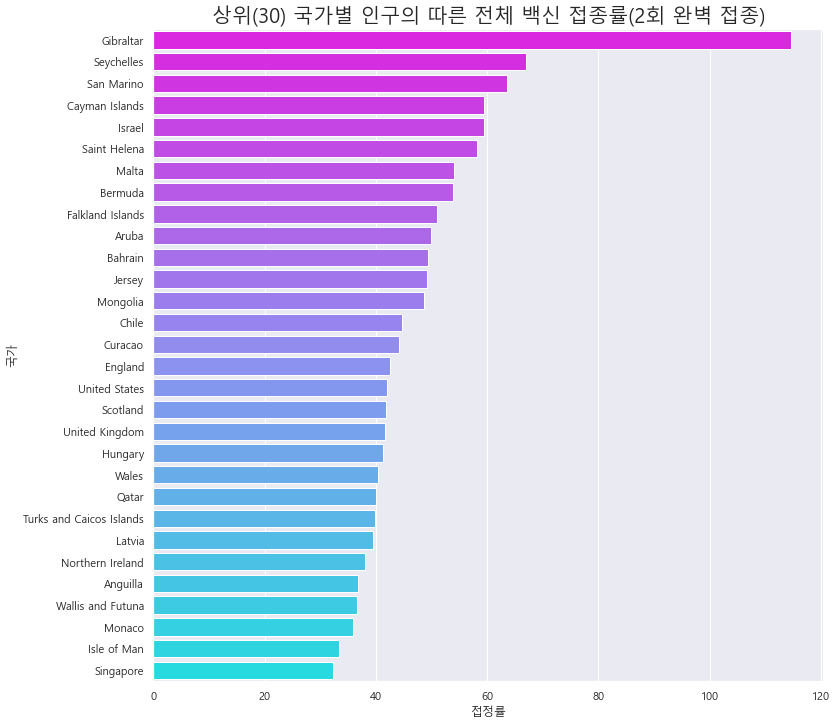

In [57]:
x = vacc_df.groupby('country')['people_fully_vaccinations_per_hundred(count)'].mean().sort_values(ascending=False).head(30) # 위에 출력한 값을 x 변수에 담아서 그래프를 출력합니다.
plt.figure(figsize=(12,12)) # 그래프의 크기를 정해줍니다.
sns.barplot(x.values, # x축으로 변수 x의 값을 불러옵니다. 
            x.index, # y 축으로 변수 x의 인덱스(명칭)을 불러옵니다.
            palette='cool_r') # 색상을 지정해줍니다.
plt.title('상위(30) 국가별 인구의 따른 전체 백신 접종률(2회 완벽 접종)', fontsize=20)
plt.xlabel('접정률')
plt.ylabel('국가')
plt.show()

#### 날짜별 전체 백신 접종 수

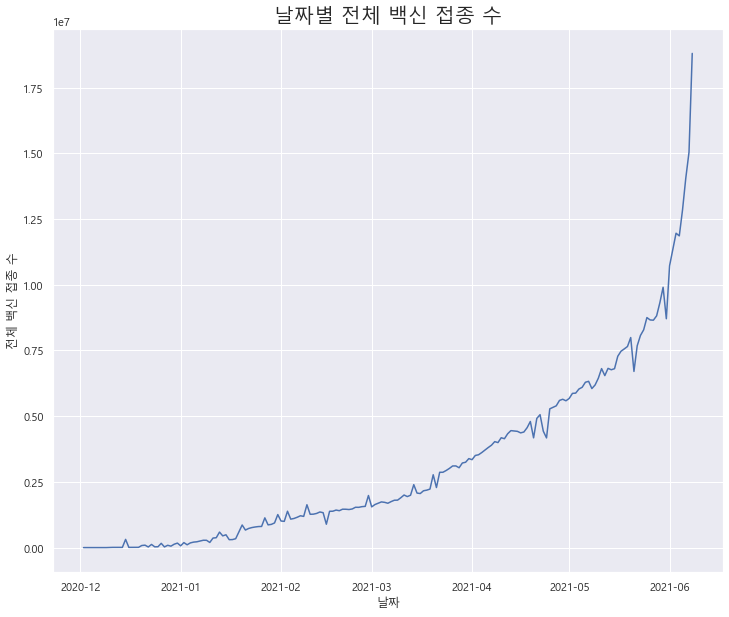

In [58]:
plt.figure(figsize=(12,10)) # 그래프의 크기를 정해줍니다.
sns.lineplot(data=vacc_df, # 전체 데이터를 불러옵니다.
             x='date', # x축으로 날짜 데이터를 불러옵니다.
             y='total_vaccinations', # y축으로 전체 백신 접종수를 불러옵니다.
             ci=None)
plt.title('날짜별 전체 백신 접종 수', fontsize=20)
plt.xlabel('날짜')
plt.ylabel('전체 백신 접종 수')
plt.show()

#### 날짜별 일일 백신 접종 수

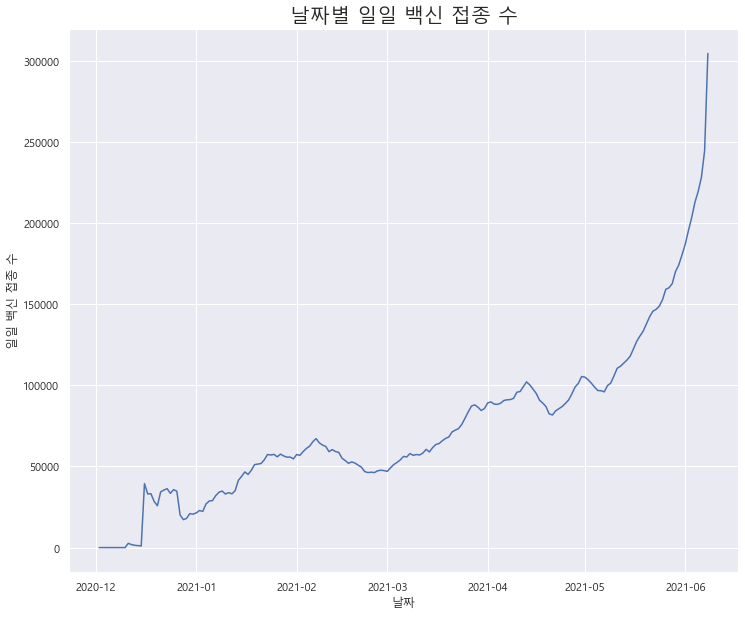

In [59]:
plt.figure(figsize=(12,10)) # 그래프의 크기를 정해줍니다.
sns.lineplot(data=vacc_df, # 전체 데이터를 불러옵니다.
             x='date', # x축으로 날짜 데이터를 불러옵니다.
             y='daily_vaccinations', # y축으로 일일 백신 접종수를 불러옵니다.
             ci=None)
plt.title('날짜별 일일 백신 접종 수', fontsize=20)
plt.xlabel('날짜')
plt.ylabel('일일 백신 접종 수')
plt.show()

<br>
<br>

## 3. 한국의 백신 접종 분석

#### 한국의 전체 백신 접종 수
2월 이후로 백신이 공급되었으며, 5월 전까지 전체적으로 백신 접종이 적은 것을 확인할수 있으며, 5월 말을 기점으로 접종자 수가 많아지는 것을 확인할 수 있다.

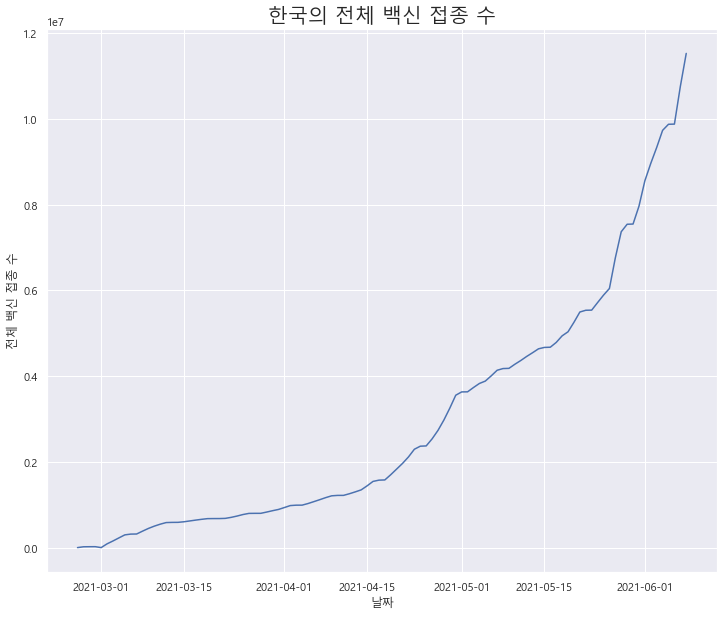

In [60]:
plt.figure(figsize=(12,10))
sns.lineplot(data=vacc_df[vacc_df['country'] == 'South Korea'], # 전체 데이터에서 한국과 동일한 컬럼만 출력합니다.
             x='date',# x축으로 날짜 데이터를 불러옵니다. 
             y='total_vaccinations', # y 축으로 전체 백신 접종수 데이터를 불러옵니다.
             ci=None)
plt.title('한국의 전체 백신 접종 수', fontsize=20)
plt.xlabel('날짜')
plt.ylabel('전체 백신 접종 수')
plt.show()

#### 한국의 일일 백신 접종 수
초기 백신의 물량 부족으로 4월까지는 일일 백신 접종이 적었으며, 5월에도 백신 공급이 한동안 부족하여 일일 백신 접종 수가 적은 것을 확인할 수 있다.

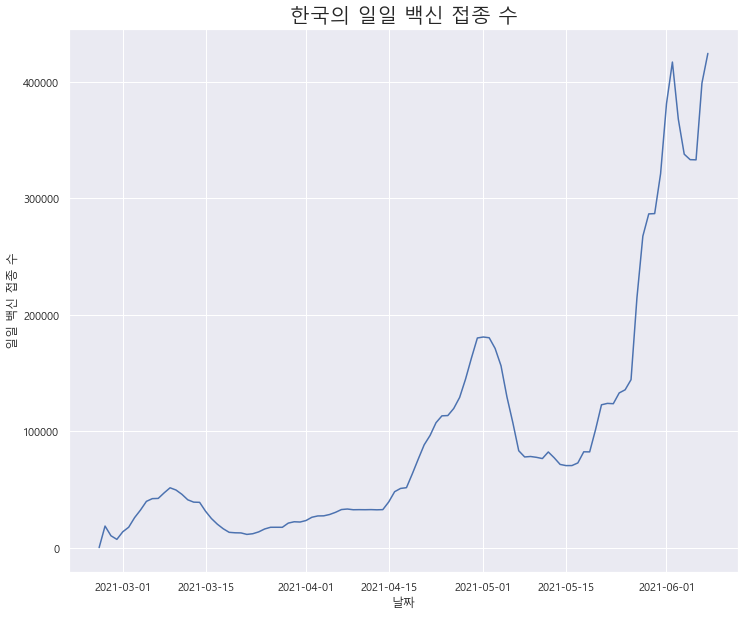

In [61]:
plt.figure(figsize=(12,10))
sns.lineplot(data=vacc_df[vacc_df['country'] == 'South Korea'], # 전체 데이터에서 한국과 동일한 컬럼만 출력합니다.
             x='date',# x 축으로 날짜 데이터를 불러옵니다. 
             y='daily_vaccinations', # y 축으로 일일 백신 접종수 데이터를 불러옵니다.
             ci=None)
plt.title('한국의 일일 백신 접종 수', fontsize=20)
plt.xlabel('날짜')
plt.ylabel('일일 백신 접종 수')
plt.show()

#### 한국의 2회이상 백신 접종 수
위 전체 백신 접종 수 그래프와 비슷하게 5월을 기점으로 백신 접종 수가 급격하게 늘어나는 것을 확인할 수 있다.

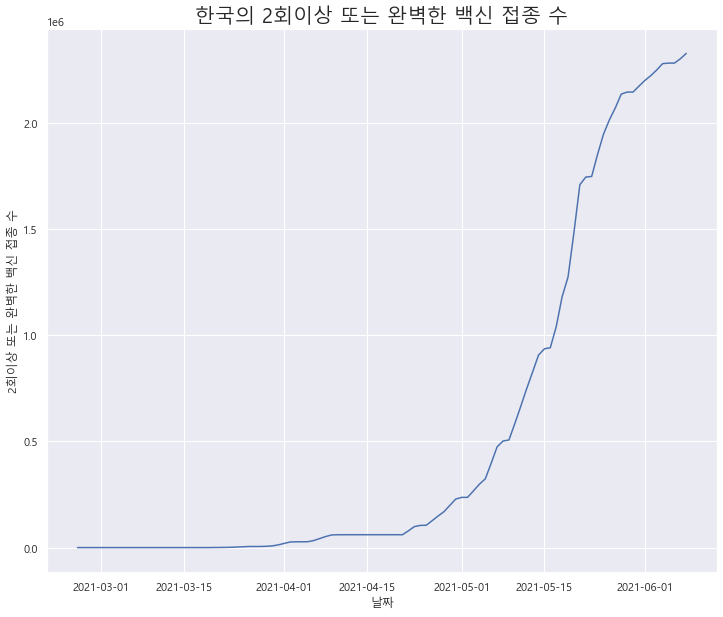

In [62]:
plt.figure(figsize=(12,10))
sns.lineplot(data=vacc_df[vacc_df['country'] == 'South Korea'], # 전체 데이터에서 한국과 동일한 컬럼만 출력합니다.
             x='date', # x 축으로 날짜 데이터를 불러옵니다. 
             y='people_fully_vaccinated', # y 축으로 2회 이상 완벽한 백신 접종수 데이터를 불러옵니다.
             ci=None)
plt.title('한국의 2회이상 또는 완벽한 백신 접종 수', fontsize=20)
plt.xlabel('날짜')
plt.ylabel('2회이상 또는 완벽한 백신 접종 수')
plt.show()

<br>
<br>

## 4. 한국 및 근처 아시아 국가의 백신 접종 분석

In [63]:
asia_5 = vacc_df.loc[(vacc_df.country == 'South Korea') | (vacc_df.country == 'Japan') | (vacc_df.country == 'China') | (vacc_df.country == 'India') | (vacc_df.country == 'Vietnam')]
# 한국, 일본, 중국, 인도, 베트남 5개국의 데이터를 asia_5 변수에 데이터를 추출합니다.

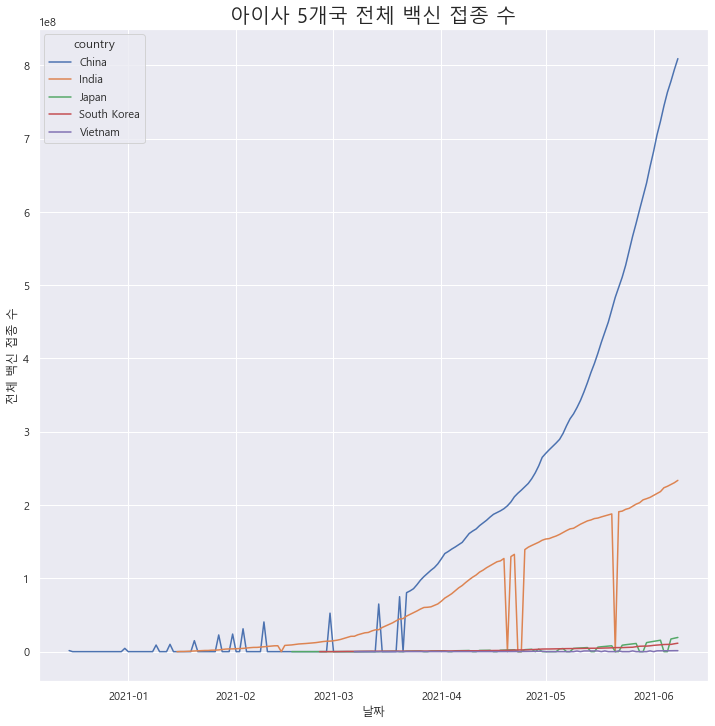

In [64]:
plt.figure(figsize=(12,12))
sns.lineplot(data=asia_5, # 위에서 추출한 asia_5 변수를 불러옵니다.
             x='date', # x 축으로 날짜 데이터를 불러옵니다.
             y='total_vaccinations', # y 축으로 전체 백신 접종수 데이터를 불러옵니다.
             hue='country', # 국가별로 색상을 다르게 설정합니다.
             ci=None)
plt.title('아이사 5개국 전체 백신 접종 수', fontsize=20)
plt.xlabel('날짜')
plt.ylabel('전체 백신 접종 수')
plt.show()

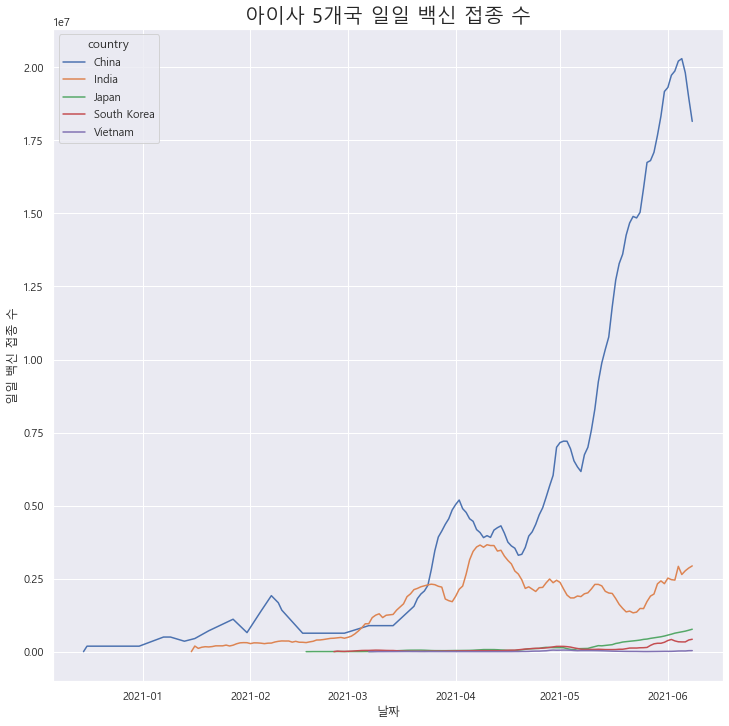

In [65]:
plt.figure(figsize=(12,12))
sns.lineplot(data=asia_5, # 위에서 추출한 asia_5 변수를 불러옵니다.
             x='date', # x 축으로 날짜 데이터를 불러옵니다.
             y='daily_vaccinations', # y 축으로 일일 백신 접종수 데이터를 불러옵니다.
             hue='country', # 국가별로 색상을 다르게 설정합니다.
             ci=None)
plt.title('아이사 5개국 일일 백신 접종 수', fontsize=20)
plt.xlabel('날짜')
plt.ylabel('일일 백신 접종 수')
plt.show()

### 중국은 자국 개발한 시노팜으로 인해 접종 수가 근처 아시아 국가에 비해 접종 수 및 일일 접종수가 많으며(인구와 비례), 한국과 일본이 비슷한 수치로 백신을 접종하는 것을 확인할 수 있다.